##**Домашнее задание по теме "Работа с переменными"**

**Задание:**

**Цель:**
Изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

**Описание задания:**
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Целевая переменная – `MedHouseVal`. Прочитать информацию о признаках датасета можно, выполнив следующий код: `print(fetch_california_housing().DESCR)`.

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или Google Colab).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
   - Сделайте выводы.
   - Удалите признаки на основании полученных значений, выводов.
   - Повторите п. 3, п. 4 на измененных данных.
7. Исследуйте оставленные признаки на выбросы.
   - Удалите выбросы в случае обнаружения.
   - Повторите п. 3, п. 4 на измененных данных.
8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
   - Повторите п. 3, п. 4 на измененных данных.
9. Сформулируйте выводы по проделанной работе.
   - Кратко опишите какие преобразования были сделаны с данными.
   - Сравните метрики всех моделей. Желательно оформление в виде таблицы вида
   
   |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
   
   - Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

**Инструменты:**

- Библиотека `sklearn.datasets`
- Jupyter Notebook/Google Colab
- GitHub

**Рекомендации по выполнению:**
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате Markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

**Решение:**

# Набор данных о жилье в Калифорнии

В датафрейме, сформированном по переписи населения в США в 1990 году,содержится 8 количественных признаков и 1 количественная целевая переменная.

Количественные признаки:
- MedInc        - медианный доход в географическом районе
- HouseAge      - медианный возраст домов в географическом районе
- AveRooms      - среднее количество комнат на домохозяйство
- AveBedrms     - среднее количество спален на домохозяйство
- Population    - население географического района
- AveOccup      - средняя заселенность домохозяйств
- Latitude      - широта географического района
- Longitude     - долгота географического района

Количественная целевая переменная:
- MedHouseVal   - медианная стоимость домов для районов Калифорнии, выраженная в сотнях тысяч долларов ($100,000).


# 1. Получение данных и загрузка их в рабочую среду

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# выгружаем данные
data = datasets.fetch_california_housing(as_frame=True).frame

In [ ]:
# смотрим на данные
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 2. Проверка данных на наличие пропусков и их удаление

In [ ]:
# смотрим типы данных и наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# дополнительно, проверка на пропуски
data.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Пропусков в данных нет.

In [ ]:
# смотрим статистики
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 3. Разделение выборки на обучающее и тестовое подмножества

In [ ]:
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве

In [ ]:
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Вычисление метрик на обучающем множестве
y_train_pred = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Метрики на обучающем множестве:")
print(f"RMSE: {train_rmse:.2f}")
print(f"R^2: {train_r2:.2f}")

# Вычисление метрик на тестовом множестве
y_test_pred = model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Метрики на тестовом множестве:")
print(f"RMSE: {test_rmse:.2f}")
print(f"R^2: {test_r2:.2f}")

Метрики на обучающем множестве:
RMSE: 0.72
R^2: 0.61
Метрики на тестовом множестве:
RMSE: 0.75
R^2: 0.58


Модель линейной регрессии показывает средние результаты на обучающем и тестовом множествах. Есть потенциал для улучшения показателей RMSE и R^2. Необходимо продолжить анализ данных и применить дополнительные методы обработки данных.

# 5. Построение графика распределения целевой переменной и проверка на выбросы

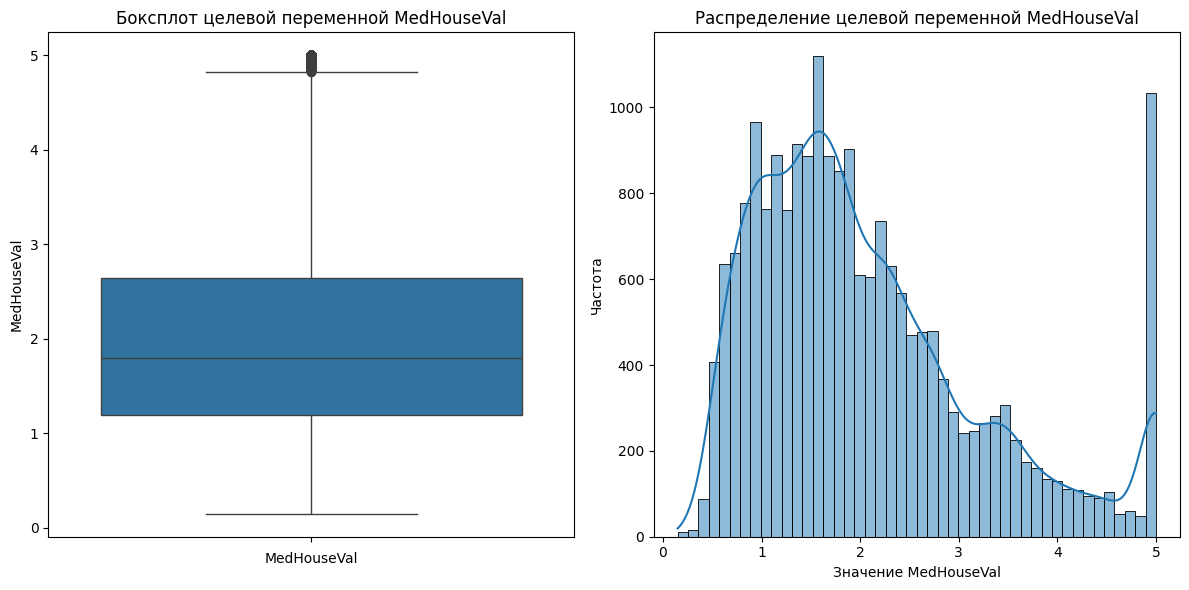

In [ ]:
# 1. Построение боксплота
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data['MedHouseVal'])
plt.title('Боксплот целевой переменной MedHouseVal')
plt.xlabel('MedHouseVal')

# 2. Построение гистограммы распределения целевой переменной
plt.subplot(1, 2, 2)
sns.histplot(data['MedHouseVal'], kde=True)
plt.title('Распределение целевой переменной MedHouseVal')
plt.xlabel('Значение MedHouseVal')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Выбросы есть. Но требуется уточнение, отражают ли они распределение данных или являются аномалиями.

In [ ]:
# Для переменной MedHouseVal:
q1 = data['MedHouseVal'].quantile(0.25)
q3 = data['MedHouseVal'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Для переменной MedHouseVal:")
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")

outliers = data[(data['MedHouseVal'] < lower_bound) | (data['MedHouseVal'] > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")

Для переменной MedHouseVal:
Нижняя граница выбросов: -0.98
Верхняя граница выбросов: 4.82
Количество выбросов: 1071


Из 20640 строк 1071 строк - это выбросы.

Посмотрим выброы на карте, чтобы оценить, не связаны ли они с расположением. Воспользуемся библиотекой Folium в Phyton.

In [ ]:
import folium

In [ ]:
# Создание начальной карты с центром на средних координатах широты и долготы
m = folium.Map(location=[outliers['Latitude'].mean(), outliers['Longitude'].mean()], zoom_start=10)

In [ ]:
# Добавляем маркеры
for index, row in outliers.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"MedHouseVal:{row['MedHouseVal']}, parse_html=True").add_to(m)


In [ ]:
m

Исходя из графика выбросы обусловлены расположением домов непосредственно на береговой линии и являются особенностями распределения данных. Удалять не будем.

# 6. Вычисление и вывод корреляционной матрицы, удаление признаков и повторное обучение

In [ ]:
# создадим матрицу
correlation_matrix = data.corr()

In [ ]:
# выведем матрицу
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


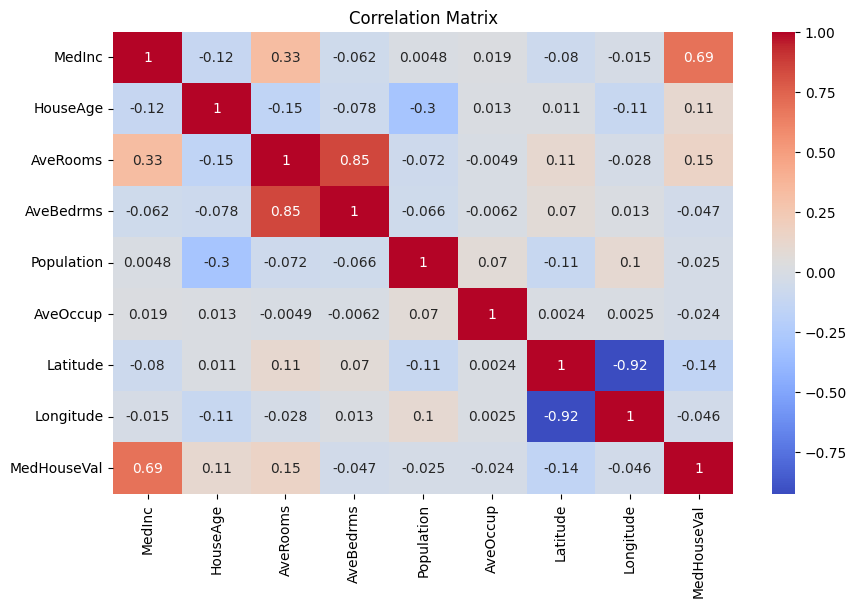

In [ ]:
# визуализируем
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Исходя из анализа корреляции в таблице, следующие признаки можно рассмотреть для удаления:

1. `AveBedrms` (среднее количество спален): имеет высокую корреляцию с `AveRooms` (среднее количество комнат).
2. `Latitude` и `Longitude`: эти признаки сильно коррелируют между собой и могут нести дублирующую информацию о местоположении. Один из показателей можно удалить.

In [ ]:
# Удаление выбранных признаков
X_mod = X.drop(['AveBedrms', 'Latitude'], axis=1)

X_train_mod, X_test_mod, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии на измененном наборе признаков
model_mod = LinearRegression()
model_mod.fit(X_train_mod, y_train)

# Вычисление метрик на обучающем множестве с измененными признаками
y_train_pred_mod = model_mod.predict(X_train_mod)
train_rmse_mod = mean_squared_error(y_train, y_train_pred_mod, squared=False)
train_r2_mod = r2_score(y_train, y_train_pred_mod)

print("Метрики на обучающем множестве с удалением признаков:")
print(f"RMSE: {train_rmse_mod:.2f}")
print(f"R^2: {train_r2_mod:.2f}")

# Вычисление метрик на тестовом множестве с измененными признаками
y_test_pred_mod = model_mod.predict(X_test_mod)
test_rmse_mod = mean_squared_error(y_test, y_test_pred_mod, squared=False)
test_r2_mod = r2_score(y_test, y_test_pred_mod)

print("Метрики на тестовом множестве с удалением признаков:")
print(f"RMSE: {test_rmse_mod:.2f}")
print(f"R^2: {test_r2_mod:.2f}")

Метрики на обучающем множестве с удалением признаков:
RMSE: 0.80
R^2: 0.52
Метрики на тестовом множестве с удалением признаков:
RMSE: 0.81
R^2: 0.50


Эти результаты говорят о том, что удаление признаков 'AveBedrms' и 'Latitude' не привело к улучшению качества модели. RMSE увеличился до 0.81, что означает, что модель стала менее точной в прогнозировании целевой переменной. Коэффициент детерминации (R^2) также уменьшился до 0.50, что указывает на то, что только 50% изменчивости целевой переменной объясняется моделью после удаления признаков.

# 7. Исследование признаков на выбросы, их удаление и повторное обучение


Рассмотрим выбросы для остальных переменных.

In [ ]:
# Для переменной HouseAge:
q1_houseage = data['HouseAge'].quantile(0.25)
q3_houseage = data['HouseAge'].quantile(0.75)
iqr_houseage = q3_houseage - q1_houseage
lower_bound_houseage = q1_houseage - 1.5 * iqr_houseage
upper_bound_houseage = q3_houseage + 1.5 * iqr_houseage

print("Для переменной HouseAge:")
print(f"Нижняя граница выбросов: {lower_bound_houseage:.2f}")
print(f"Верхняя граница выбросов: {upper_bound_houseage:.2f}")

# Поиск выбросов
houseage_outliers = data[(data['HouseAge'] < lower_bound_houseage) | (data['HouseAge'] > upper_bound_houseage)]
print(f"Количество выбросов: {len(houseage_outliers)}")

Для переменной HouseAge:
Нижняя граница выбросов: -10.50
Верхняя граница выбросов: 65.50
Количество выбросов: 0


В данной переменной выбросов нет.

Посмотрим на выбросы в среднем доходе.

In [ ]:
# Для переменной MedInc:
q1 = data['MedInc'].quantile(0.25)
q3 = data['MedInc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Для переменной MedInc:")
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")

medinc_outliers = data[(data['MedInc'] < lower_bound) | (data['MedInc'] > upper_bound)]
print(f"Количество выбросов: {len(medinc_outliers)}")

Для переменной MedInc:
Нижняя граница выбросов: -0.71
Верхняя граница выбросов: 8.01
Количество выбросов: 681


In [ ]:
# Создание начальной карты с центром на средних координатах широты и долготы
m_medinc_outliers = folium.Map(location=[outliers['Latitude'].mean(), outliers['Longitude'].mean()], zoom_start=10)

In [ ]:
# Добавляем маркеры
for index, row in medinc_outliers.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"MedInc: {row['MedInc']}").add_to(m_medinc_outliers)

In [ ]:
m_medinc_outliers

Выбросы отражают тот факт, что средний доход может быть выше в районах у побережья так же как и стоимость. Это не аномалии в данных, удалять не нужно.

Посмотрим на выбросы с плотностью населения.


In [ ]:
# Для переменной Population:
q1_pop = data['Population'].quantile(0.25)  # Первый квартиль
q3_pop = data['Population'].quantile(0.75)  # Третий квартиль
iqr_pop = q3_pop - q1_pop  # Межквартильный размах
lower_bound_pop = q1_pop - 1.5 * iqr_pop  # Нижняя граница выбросов
upper_bound_pop = q3_pop + 1.5 * iqr_pop  # Верхняя граница выбросов

print("Для переменной Population:")
print(f"Нижняя граница выбросов: {lower_bound_pop:.2f}")
print(f"Верхняя граница выбросов: {upper_bound_pop:.2f}")

# Поиск выбросов
pop_outliers = data[(data['Population'] < lower_bound_pop) | (data['Population'] > upper_bound_pop)]
print(f"Количество выбросов: {len(pop_outliers)}")

Для переменной Population:
Нижняя граница выбросов: -620.00
Верхняя граница выбросов: 3132.00
Количество выбросов: 1196


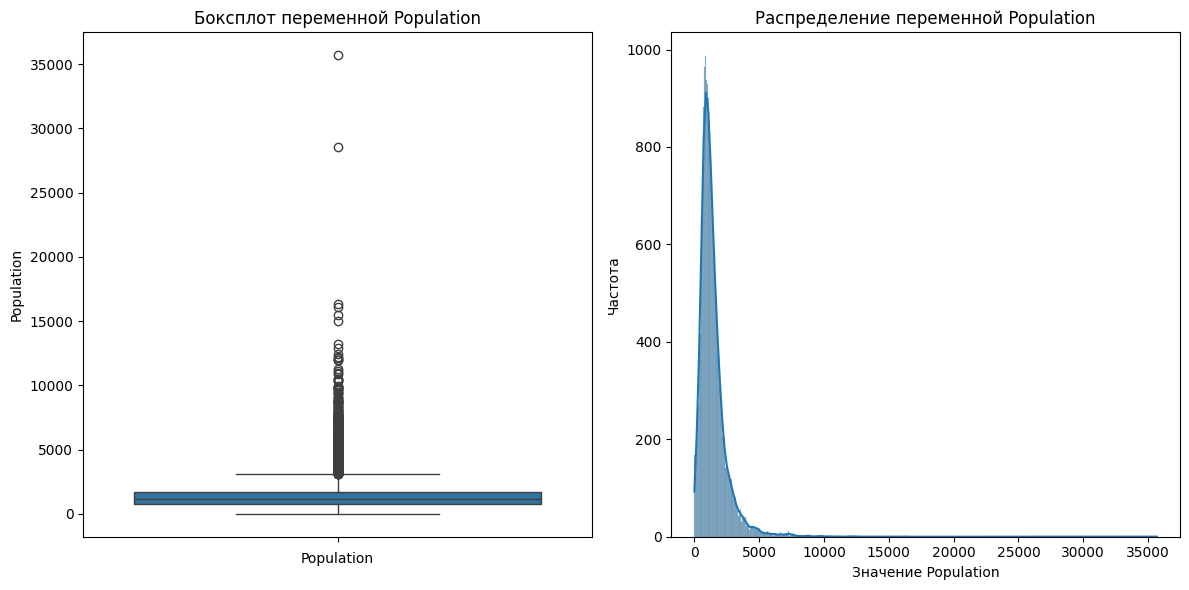

In [ ]:
# Визуализируем
plt.figure(figsize=(12, 6))

# Построение боксплота
plt.subplot(1, 2, 1)
sns.boxplot(data['Population'])
plt.title('Боксплот переменной Population')
plt.xlabel('Population')

# Построение гистограммы распределения
plt.subplot(1, 2, 2)
sns.histplot(data['Population'], kde=True)
plt.title('Распределение переменной Population')
plt.xlabel('Значение Population')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [ ]:
# Создание начальной карты с центром на средних координатах широты и долготы
m_pop_outliers = folium.Map(location=[outliers['Latitude'].mean(), outliers['Longitude'].mean()], zoom_start=10)

In [ ]:
# Добавляем маркеры
for index, row in pop_outliers.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"Population: {row['Population']}").add_to(m_pop_outliers)

In [ ]:
m_pop_outliers

Плотность населения действительно выше в центральных и прибрежных районах, это особенности распределения данных.
Не удаляем.

In [ ]:
# Для переменной AveOccup:
q1_occ = data['AveOccup'].quantile(0.25)  # Первый квартиль
q3_occ = data['AveOccup'].quantile(0.75)  # Третий квартиль
iqr_occ = q3_occ - q1_occ  # Межквартильный размах
lower_bound_occ = q1_occ - 1.5 * iqr_occ  # Нижняя граница выбросов
upper_bound_occ = q3_occ + 1.5 * iqr_occ  # Верхняя граница выбросов

print("Для переменной AveOccup:")
print(f"Нижняя граница выбросов: {lower_bound_occ:.2f}")
print(f"Верхняя граница выбросов: {upper_bound_occ:.2f}")

# Поиск выбросов
aveoccup_outliers = data[(data['AveOccup'] < lower_bound_occ) | (data['AveOccup'] > upper_bound_occ)]
print(f"Количество выбросов: {len(aveoccup_outliers)}")

Для переменной AveOccup:
Нижняя граница выбросов: 1.15
Верхняя граница выбросов: 4.56
Количество выбросов: 711


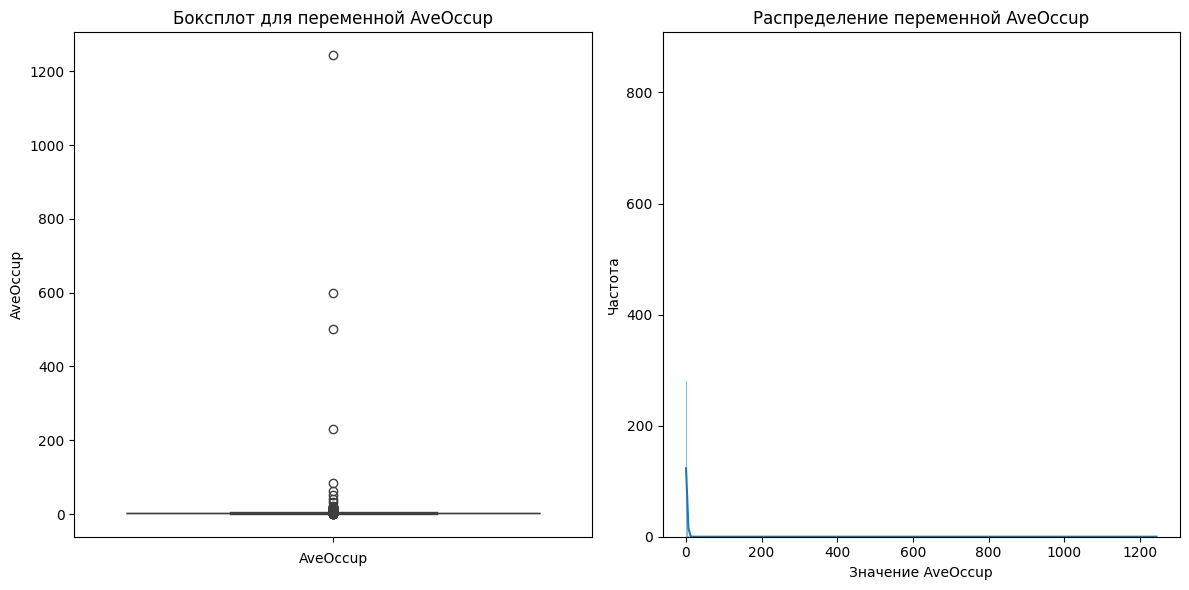

In [ ]:
# Визуализируем
plt.figure(figsize=(12, 6))

# 1. Построение боксплота
plt.subplot(1, 2, 1)
sns.boxplot(data['AveOccup'])
plt.title('Боксплот для переменной AveOccup')
plt.xlabel('AveOccup')

# 2. Построение гистограммы
plt.subplot(1, 2, 2)
sns.histplot(data['AveOccup'], kde=True)
plt.title('Распределение переменной AveOccup')
plt.xlabel('Значение AveOccup')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Здесь мы видим величины, значительно превышающие окно среднего значения. Это аномалии и их будем удалять.

Посмотрим на количество спален.

In [ ]:
# Для переменной AveBedrms:
q1_bedrms = data['AveBedrms'].quantile(0.25)
q3_bedrms = data['AveBedrms'].quantile(0.75)
iqr_bedrms = q3_bedrms - q1_bedrms
lower_bound_bedrms = q1_bedrms - 1.5 * iqr_bedrms
upper_bound_bedrms = q3_bedrms + 1.5 * iqr_bedrms

print("Для переменной AveBedrms:")
print(f"Нижняя граница выбросов: {lower_bound_bedrms:.2f}")
print(f"Верхняя граница выбросов: {upper_bound_bedrms:.2f}")

# Поиск выбросов
avebedrms_outliers = data[(data['AveBedrms'] < lower_bound_bedrms) | (data['AveBedrms'] > upper_bound_bedrms)]
print(f"Количество выбросов: {len(avebedrms_outliers)}")

Для переменной AveBedrms:
Нижняя граница выбросов: 0.87
Верхняя граница выбросов: 1.24
Количество выбросов: 1424


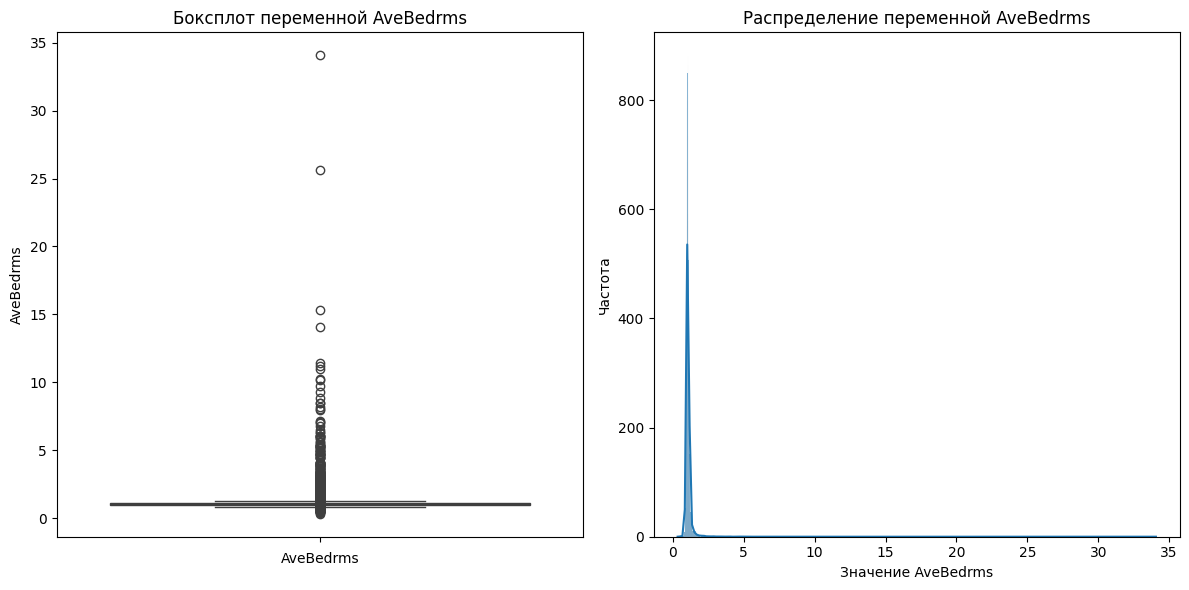

In [ ]:
# Визуализируем:
plt.figure(figsize=(12, 6))

# Построение боксплота
plt.subplot(1, 2, 1)
sns.boxplot(data['AveBedrms'])
plt.title('Боксплот переменной AveBedrms')
plt.xlabel('AveBedrms')

# Построение гистограммы распределения
plt.subplot(1, 2, 2)
sns.histplot(data['AveBedrms'], kde=True)
plt.title('Распределение переменной AveBedrms')
plt.xlabel('Значение AveBedrms')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Посмотрим на количество комнат.

In [ ]:
# Для переменной AveRooms:
q1 = data['AveRooms'].quantile(0.25)
q3 = data['AveRooms'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Для переменной AveRooms:")
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")

averooms_outliers = data[(data['AveRooms'] < lower_bound) | (data['AveRooms'] > upper_bound)]
print(f"Количество выбросов: {len(averooms_outliers)}")

Для переменной AveRooms:
Нижняя граница выбросов: 2.02
Верхняя граница выбросов: 8.47
Количество выбросов: 511


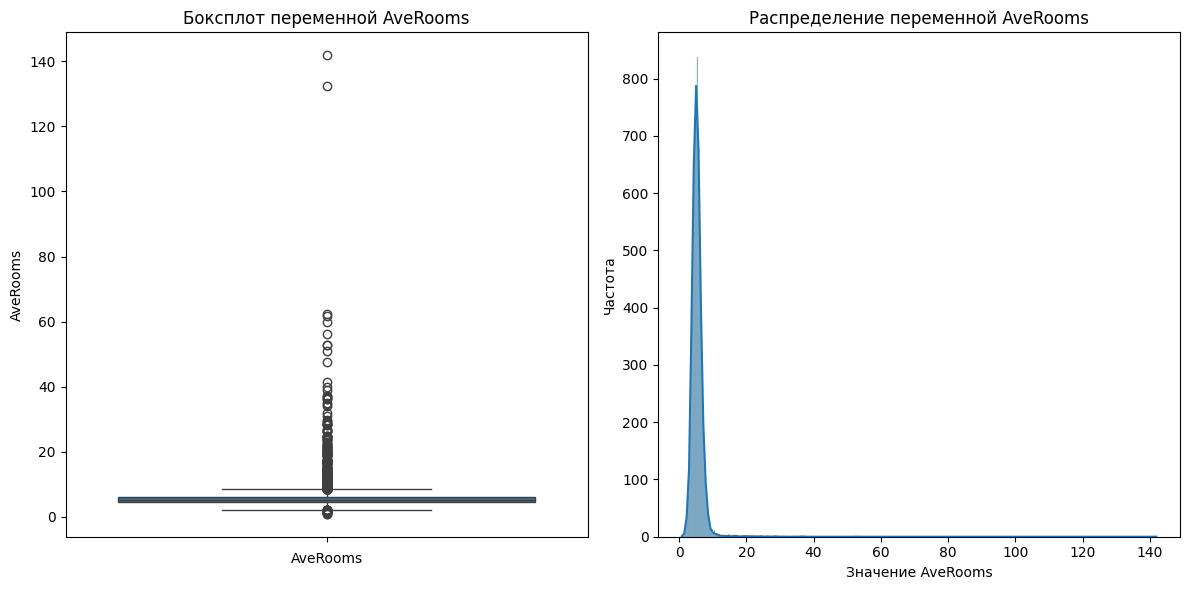

In [ ]:
# Визуализируем:
plt.figure(figsize=(12, 6))

# Построение боксплота
plt.subplot(1, 2, 1)
sns.boxplot(data['AveRooms'])
plt.title('Боксплот переменной AveRooms')
plt.xlabel('AveRooms')

# Построение гистограммы распределения
plt.subplot(1, 2, 2)
sns.histplot(data['AveRooms'], kde=True)
plt.title('Распределение переменной AveRooms')
plt.xlabel('Значение AveRooms')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Для переменных 'AveRooms' и 'AveBedrms' визуализация позволяет выделить несколько значений, которые представляются неправдоподобными и противоречат здравому смыслу. Удалим их.

Удаляем выбросы из данных для переменных 'AveOccup', 'AveRooms' и 'AveBedrms'

In [ ]:
# Удаление выбросов для переменной 'AveOccup'
data_cleaned = data[~data['AveOccup'].isin(aveoccup_outliers['AveOccup'])]

# Удаление выбросов для переменной 'AveRooms'
data_cleaned = data_cleaned[~data_cleaned['AveRooms'].isin(averooms_outliers['AveRooms'])]

# Удаление выбросов для переменной 'AveBedrms'
data_cleaned = data_cleaned[~data_cleaned['AveBedrms'].isin(avebedrms_outliers['AveBedrms'])]

# Проверка количества строк до и после удаления выбросов
print(f"Количество строк до удаления выбросов: {len(data)}")
print(f"Количество строк после удаления выбросов: {len(data_cleaned)}")

Количество строк до удаления выбросов: 20640
Количество строк после удаления выбросов: 18405


In [ ]:
# Признаки и целевая переменная без выбросов
y_cleaned = data_cleaned['MedHouseVal']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [ ]:
X_cleaned

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# Создание и обучение модели линейной регрессии на очищенных данных
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Предсказание на обучающем множестве
y_train_pred_cleaned = model_cleaned.predict(X_train_cleaned)
train_rmse_cleaned = mean_squared_error(y_train_cleaned, y_train_pred_cleaned, squared=False)
train_r2_cleaned = r2_score(y_train_cleaned, y_train_pred_cleaned)
print(f"Метрики на обучающем множестве (с удаленными выбросами):")
print(f"RMSE: {train_rmse_cleaned:.2f}")
print(f"R^2: {train_r2_cleaned:.2f}")

# Предсказание на тестовом множестве
y_test_pred_cleaned = model_cleaned.predict(X_test_cleaned)
test_rmse_cleaned = mean_squared_error(y_test_cleaned, y_test_pred_cleaned, squared=False)
test_r2_cleaned = r2_score(y_test_cleaned, y_test_pred_cleaned)
print(f"Метрики на тестовом множестве (с удаленными выбросами):")
print(f"RMSE: {test_rmse_cleaned:.2f}")
print(f"R^2: {test_r2_cleaned:.2f}")

Метрики на обучающем множестве (с удаленными выбросами):
RMSE: 0.64
R^2: 0.68
Метрики на тестовом множестве (с удаленными выбросами):
RMSE: 0.64
R^2: 0.68


После удаления выбросов RMSE на обучающем и тестовом множествах снизился с 0.72 и 0.75 соответственно до 0.64 на обоих наборах данных. Это означает, что после удаления выбросов модель предсказывает целевую переменную с меньшей ошибкой.
Коэффициент детерминации (R^2) после удаления выбросов вырос с 0.61 и 0.58 соответственно до 0.68 как на обоих наборах данных. Это свидетельствует о том, что после очистки данных модель лучше объясняет целевую переменную.


# 8. Преобразование признаков с помощью масштабирования

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

In [ ]:
X_train_cleaned

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16861,2.3750,46.0,5.500000,0.916667,30.0,2.500000,37.63,-122.42
7910,3.8654,27.0,5.500882,1.119929,1887.0,3.328042,33.88,-118.09
20579,1.9559,36.0,5.626316,1.200000,567.0,2.984211,38.80,-121.72
15710,4.4464,52.0,4.394919,1.064665,831.0,1.919169,37.79,-122.44
14512,6.0891,5.0,5.469595,0.918919,1063.0,3.591216,32.91,-117.16
...,...,...,...,...,...,...,...,...
12800,2.4205,43.0,4.433962,1.119497,464.0,2.918239,38.61,-121.46
13528,3.0078,25.0,4.912127,1.047452,1650.0,2.899824,34.17,-117.31
6046,3.1500,26.0,4.724691,1.004938,3367.0,4.156790,34.04,-117.73
909,4.9167,34.0,5.963675,1.057692,1276.0,2.726496,37.55,-122.01


In [ ]:
X_train_scaled

array([[-0.85126872,  1.36978439,  0.2384303 , ..., -0.56738966,
         0.94758674, -1.41122797],
       [-0.01633427, -0.14678565,  0.23921746, ...,  0.75394513,
        -0.82696239,  0.76394822],
       [-1.08605202,  0.57158963,  0.3511856 , ...,  0.20528124,
         1.50124607, -1.05958286],
       ...,
       [-0.41710729, -0.22660513, -0.45364598, ...,  2.07640566,
        -0.7512483 ,  0.94479428],
       [ 0.57261272,  0.41195068,  0.65232819, ..., -0.20596287,
         0.90972969, -1.2052644 ],
       [-0.18602136,  0.41195068, -1.14679003, ...,  0.49505459,
         0.82928346, -1.11986488]])

Обучим модель линейной регрессии на масштабированных данных.

In [ ]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_cleaned)

LinearRegression()

Оценим модель, используя метрики RMSE (среднеквадратичная ошибка) и R^2 (коэффициент детерминации) на обучающем и тестовом множестве.

In [ ]:
# Предсказание на обучающем множестве
y_train_pred_scaled = model_scaled.predict(X_train_scaled)
train_rmse_scaled = mean_squared_error(y_train_cleaned, y_train_pred_scaled, squared=False)
train_r2_scaled = r2_score(y_train_cleaned, y_train_pred_scaled)

# Предсказание на тестовом множестве
y_test_pred_scaled = model_scaled.predict(X_test_scaled)
test_rmse_scaled = mean_squared_error(y_test_cleaned, y_test_pred_scaled, squared=False)
test_r2_scaled = r2_score(y_test_cleaned, y_test_pred_scaled)

print(f"Метрики на обучающем множестве (c масштабированием):")
print(f"RMSE: {train_rmse_scaled:.2f}")
print(f"R^2: {train_r2_scaled:.2f}")

print(f"Метрики на тестовом множестве (c масштабированием):")
print(f"RMSE: {test_rmse_scaled:.2f}")
print(f"R^2: {test_r2_scaled:.2f}")

Метрики на обучающем множестве (c масштабированием):
RMSE: 0.64
R^2: 0.68
Метрики на тестовом множестве (c масштабированием):
RMSE: 0.64
R^2: 0.68


# 9. Формулировка выводов по проделанной работе

a. Были проведены следующие преобразования с данными:

1. Обучение модели линейной регрессии и оценка метрик на исходных данных.
2. Проверка корреляции между признаками. Удаление признаков 'AveBedrms' и 'Latitude' основываясь на корреляционной матрице. Повторное обучение модели линейной регрессии и оценка метрик после удаления признаков.
3. Анализ и удаление выбросов в переменных 'Population', 'AveOccup', 'AveRooms', и 'AveBedrms'.Повторное обучение модели линейной регрессии и оценка метрик после удаления выбросов.
4. Применение масштабирования признаков с помощью StandardScaler. Повторное обучение модели линейной регрессии и оценка метрик после масштабирования.

b. Сравнение метрик всех моделей:

| Модель                                            | RMSE | R^2  | Признаки и преобразования                                                                                                                                                                                                                                                                                                                                       |
|----------------------------------------------------|------|------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Исходные данные                                    | 0.72 | 0.61 | Все признаки                                                                                                                                                                                                                                                                                                                                        |
| После удаления признаков                           | 0.80 | 0.52 | Удалены признаки 'AveBedrms' и 'Latitude' основываясь на корреляционной матрице                                                                                                                                                                                                                     |
| После удаления выбросов                            | 0.64 | 0.68 | Все признаки. Данные очищены от выбросов в переменных 'AveOccup', 'AveRooms', и 'AveBedrms'                                                                                                                                                                                                                          |
| После масштабирования                   | 0.64 | 0.68 | Все признаки. Признаки масштабированы с помощью StandardScaler                                                                                                                                                                                                                                                                                                                  |

c. Модели в целом удовлетворительно справились с поставленной задачей.                                                                     Было проведено несколько этапов обработки данных, включая проверку на пропуски, удаление коррелированных признаков, удаление выбросов и масштабирование.

Не все способы обработки были одинаково эффективны. Например, удаление признаков 'AveBedrms' и 'Latitude' не привело к ухудшению качества модели. RMSE увеличился до 0.80, что означает, что модель стала менее точной в прогнозировании целевой переменной. Коэффициент детерминации (R^2) также уменьшился до 0.52, что указывает на то, что только 52% изменчивости целевой переменной объясняется моделью после удаления признаков.

После удаления выбросов из переменных 'AveOccup', 'AveRooms' и 'AveBedrms', мы получили улучшение результатов модели - снижение RMSE до 0.64 и увеличение коэффициента детерминации до 0.68. Это говорит о том, что модель стала лучше предсказывать целевую переменную после очистки данных от выбросов.

Масштабирование признаков с помощью StandardScaler в данном конкретном случае не привело к дополнительному улучшению результатов модели. Возможно, это связано с тем, что масштабирование признаков не оказало значительного влияния на их дискретность или разброс значений после удаления выбросов.